<a href="https://colab.research.google.com/github/smbillah/ist526/blob/main/%5Bhw3_sol%5D_starter_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Essential Libraries

In [1]:
# python visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px
%matplotlib inline

import pandas as pd
import numpy as np

import plotly.express as px

# Q7. Load Data from GitHub

In [2]:
# ref: https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url

#  sample data 
url = 'https://raw.githubusercontent.com/smbillah/ist526/main/liver_dataset.csv'

# pandas call to read csv file 
df = pd.read_csv(url)

# quickly show the dataframe
df.head()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,dummy_label
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,1
2,86,54,33,16,54,0.0,1
3,91,78,34,24,36,0.0,1
4,87,70,12,28,10,0.0,1


In [3]:
# it's a good idea to peek at the tail too. 
# Note, we need display(.) function if more than output is printed
display(df.head())
display(df.tail())

# get column names
display(df.columns)

,mcv,alkphos,sgpt,sgot,gammagt,drinks,dummy_label
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,1
2,86,54,33,16,54,0.0,1
3,91,78,34,24,36,0.0,1
4,87,70,12,28,10,0.0,1


,mcv,alkphos,sgpt,sgot,gammagt,drinks,dummy_label
340,99,75,26,24,41,12.0,1
341,96,69,53,43,203,12.0,1
342,98,77,55,35,89,15.0,1
343,91,68,27,26,14,16.0,1
344,98,99,57,45,65,20.0,1


Index(['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks', 'dummy_label'], dtype='object')

# Q7. Exploratory analysis with Seaborn
http://seaborn.pydata.org/examples/index.html

In [4]:
# we already imported seaborn library in the first cell. Doing it again to emphasis.
import seaborn as sns

## Create a distrubtion/histogram

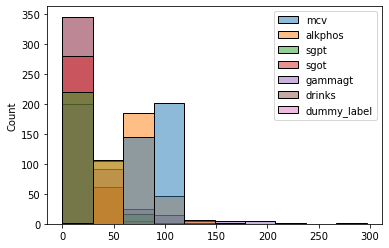

In [5]:
# for all attributes
sns.histplot(df, bins = 10)
plt.show()

## Scatter plot matrix

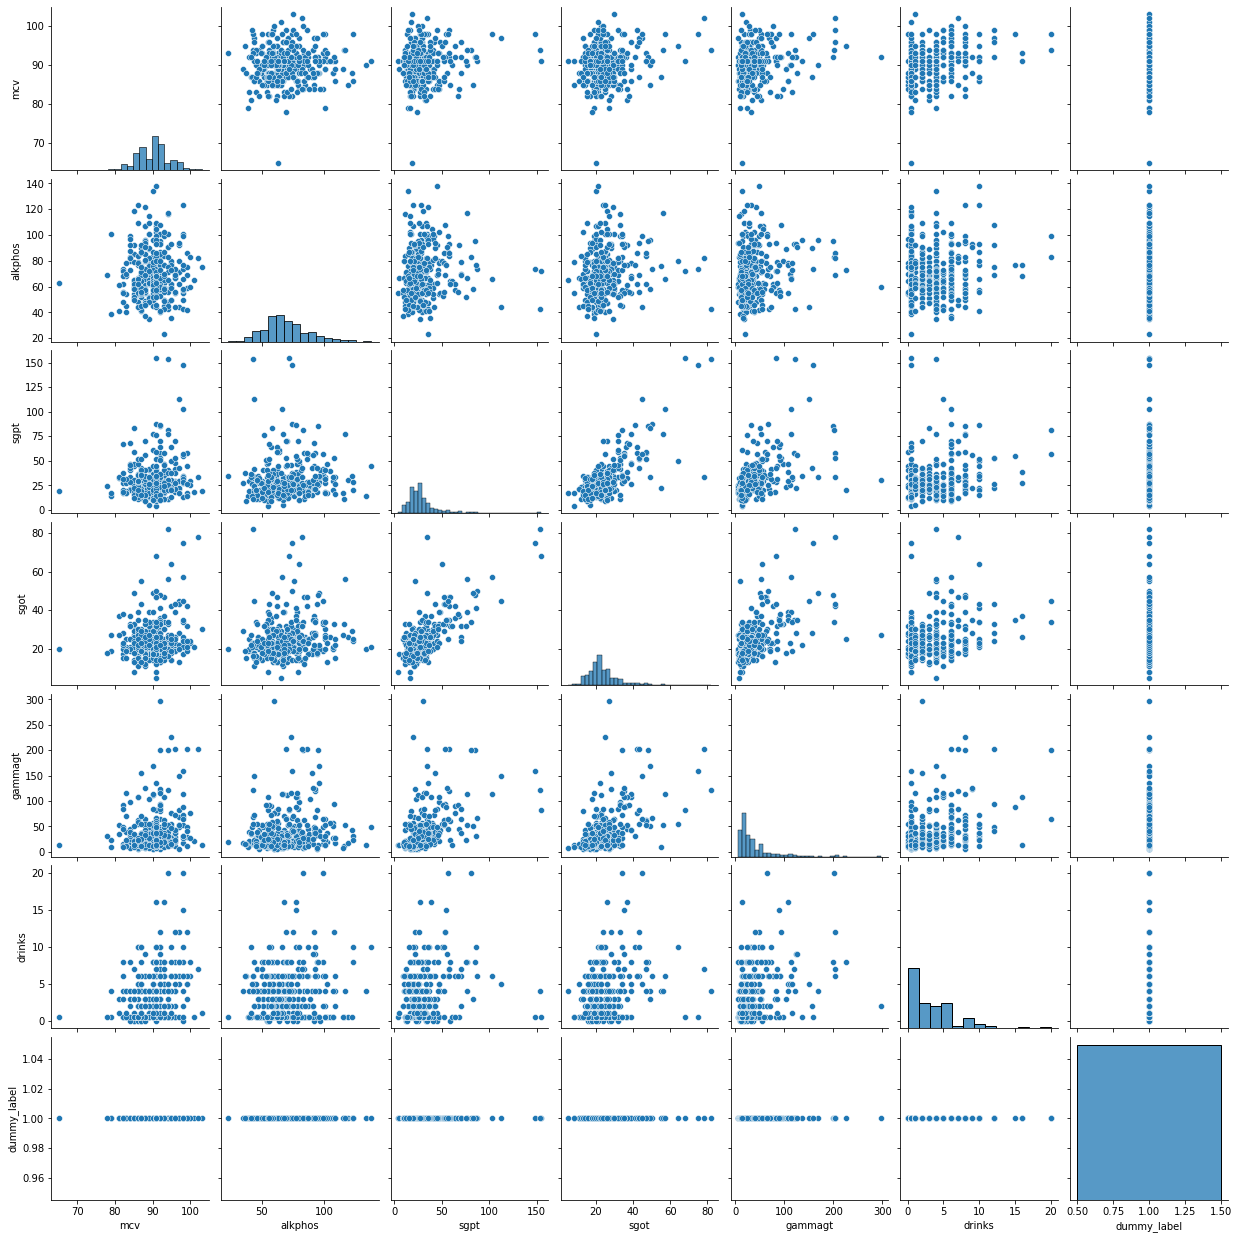

In [6]:
sns.pairplot(df)
plt.show()

* Data in the last column (dummy_lavel) is clearly categorical (indicated by points arranged in a vertical line).
* Data in the second to last column (drinks) also look like categorical (points are arranged in vertical lines).
* Points in many cells (e.g., 2nd column, row 3 to 5) are circular, indicating no correlation between two attributes.
* Points in some cells are arranged along a diagonal line, indicating some correlation between two attributes.

## Bar chart

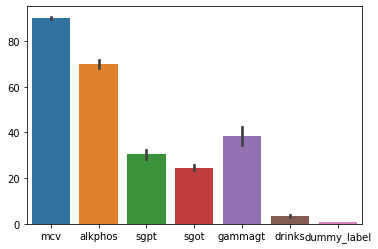

In [7]:
sns.barplot(data = df)
plt.show()

Values of each column have different ranges. E.g., 'mcv' ranges from o to 90, whereas 'sgot' ranges from 0 to 30. 
So, normalization is required. 

## Box plot

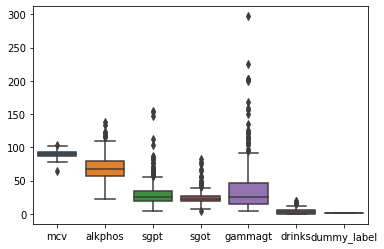

In [8]:
sns.boxplot(data = df )
plt.show()

## Correlation Matrix

In [9]:
df.corr()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,dummy_label
mcv,1.000000,0.044103,0.147695,0.187765,0.222314,0.312680,NaN
alkphos,0.044103,1.000000,0.076208,0.146057,0.133140,0.100796,NaN
sgpt,0.147695,0.076208,1.000000,0.739675,0.503435,0.206848,NaN
sgot,0.187765,0.146057,0.739675,1.000000,0.527626,0.279588,NaN
gammagt,0.222314,0.133140,0.503435,0.527626,1.000000,0.341224,NaN
drinks,0.312680,0.100796,0.206848,0.279588,0.341224,1.000000,NaN
dummy_label,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Heatmap with Correlation Matrix

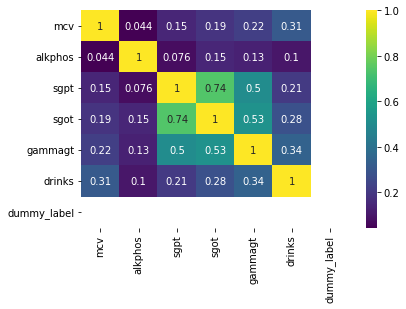

In [10]:
# 'cmap' stands for color map
sns.heatmap(df.corr(), annot = True, cmap = 'viridis') 
plt.show()

Most columns do not have a strong correlation, except for the columns 'sgot' and 'sgpt' (correlation: 0.74); 'sgot' and 'gammagt' (correlation: 0.53); and 'sgpt' and 'gammagt' (correlation: 0.5).

# Q9. Parallel Coordinate: Plotly Express

In [25]:
import plotly.express as px
# no color label

#  removing the column 'dummy_label' to create a new dataframe
df_new = df.drop(['dummy_label'], axis= 1)

fig = px.parallel_coordinates(df_new)
fig.show()


# Q10. Change column ordering in parallel coordinate based on corrleation graph

In [16]:
display(df_new.columns)

Index(['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks'], dtype='object')

In [17]:
# assuming the following order is seen in correlation graph
my_col_order = ['sgpt', 'sgot', 'gammagt', 'drinks','mcv', 'alkphos']

# use dimensions param
fig = px.parallel_coordinates(df, dimensions=my_col_order)
fig.show()

* Most data points on 'sgpt', 'sgot', and 'gammagt' have low-values. 
* There are only a few data points represting heavy drinkers (drinks > 16).
* Drag your cursor along an axis to see how filtering works in parallel cooridinate. 

# Q6. Intro to Python and Pandas Dataframe

## Create a Dummy Data Frame

In [ ]:
# Let's create a dummy data frame with string data
df_dummy = pd.DataFrame({'col1':[1,2,3], 'col2':['a', 'b', 'c'], 'col3':['jack', 'joe', 'jane']})
display(df_dummy.head())
                      

,col1,col2,col3
0,1,a,jack
1,2,b,joe
2,3,c,jane


## Convering string/char columns to categorical

In [ ]:
# convering string/char columns to categorical
df_dummy['col2'] = pd.Categorical(df_dummy['col2'])
display(df_dummy.head())

df_dummy['col3'] = pd.Categorical(df_dummy['col3'])
display(df_dummy.head())

,col1,col2,col3
0,1,a,jack
1,2,b,joe
2,3,c,jane


,col1,col2,col3
0,1,a,jack
1,2,b,joe
2,3,c,jane


Although the above datafram looks identifical, panda internally considers these columns as categorical variable. Many algorithms work with categorical data without any issue. However, if an algorithm expects numeric data, panda could provide numeric codes for these columns. See below.

In [ ]:
df_dummy['col2_code'] = df_dummy.col2.cat.codes
df_dummy['col3_code'] = df_dummy.col3.cat.codes
display(df_dummy.head())

,col1,col2,col3,col2_code,col3_code
0,1,a,jack,0,0
1,2,b,joe,1,2
2,3,c,jane,2,1


So, you can now remove 'col2' and 'col3', and work with 'col2_code' and 'col3_code' instead.

## Remove a column or a set of column

In [ ]:
df_dummy = df_dummy.drop(['col2', 'col3'], axis= 1)
display(df_dummy.head())

,col1,col2_code,col3_code
0,1,0,0
1,2,1,2
2,3,2,1


## Select columns by index

In [ ]:
df_dummy.iloc[0:2]

,col1,col2_code,col3_code
0,1,0,0
1,2,1,2


## [Background] List, Dictionary, and JSON Basics

This question refreshes the concepts of a list, dictionary, and JSON format in Python. There are plenty of online resources (e.g., https://medium.com/analytics-vidhya/python-dictionary-and-json-a-comprehensive-guide-ceed58a3e2ed) on these topics. Feel free to check those out.

**Short version:**

In Python, a square bracket (e.g., ```[..]```) indicates a list, and a curly bracket (e.g., ```{...}``` indicates a dictionary. 

For example, 

```
ages = [23, 21, 40, 43]
student = {'id': 1, 'name': 'jack', 'score': 90}

```
Here, 
* ```ages``` is a list containing 4 elements that are separated by ```,```
* ```student``` is a dictionary that contains 3 key-value pairs, separated by ```,``` 
** A key-value pair looks like ```key```:```value```. Notice that a ```:``` is separating a ```key``` from its ```value```. 

So, the dictionary ```student``` has 3 keys, 'id', 'name', and 'score' with values 1, 'jack', 'score', respectively. 

We can create a list of lists or a list of dictionaries. See the following codes:
```
age_group = [[0, 12], [13, 19], [20,29], [30, 39]]
students = [{'id': 1, 'name': 'jack', 'score': 90}, {'id': 2, 'name': 'nina', 'score': 91}, {'id': 3, 'name': 'robin', 'score': 84}]
```

Here,
* ```age_group``` is a list that contains 4 sub-lists
* ```students``` is a list that contains 3 dictionaries, where each dictionary contains 3 key-value pairs.

**JSON is nothing but a representation of lists and dictionaries in the above format**


## 6.(a) 
Create a list named ```people``` that contains 4 integers (e.g., 10, 20, 30, 34) 

In [20]:
# your code goes here
people = [10, 20, 30, 34]

## 6 (b)
Create a dictionary named ```node_val``` that contans 2 keys ('id', 'label') with values 1, and 'Jason', respectively.

In [21]:
# your code goes here
node_val = {'id':1, 'label':'Jason'}

## 6 (c)
Create another dictionary named ```edge_val``` that has two keys (```source```, and ```target```) where ```source``` has value 1 and ```target``` has value 2

In [22]:
# your code goes here
edge_val = {'source': 1, 'target': 2}

## 6 (d)
Create a dictionary named ```baby_graph``` that contains two dictionaries with keys ```'node'``` and ```'edge'``` and values ```node_val``` and ```edge_val```, respectively. 

In [23]:
# the answer is given below
baby_graph = { 'node': node_val, 'edge': edge_val}

## 6 (e)
Create a list named ```nodes_vals```containing four dictionaries of ```node_val```. You can use random values for each key in individual ```node_val```

Similarly, create a list named ```edge_vals```containing four dictionaries of ```edge_val```. Use random values of each key in the individual ```edge_val``` dictionary. 

Finally, create a dictionary named ```graph``` containing two dictionaries with keys ```'nodes'``` and ```'edges'``` and values would ```node_vals``` and ```edge_vals```, respectively. 

In [24]:
# your code
# create 4 node_val dict.
node_val1 = {'id':1, 'label':'Jason'}
node_val2 = {'id':2, 'label':'Peter'}
node_val3 = {'id':3, 'label':'Jane'}
node_val4 = {'id':4, 'label':'Jasmine'}

# create node_vals list
nodes_vals = [node_val1, node_val2, node_val3, node_val4]


# create 4 edge_val dict.
edge_val1 = {'source': 1, 'target': 2}
edge_val2 = {'source': 1, 'target': 3}
edge_val3 = {'source': 1, 'target': 4}
edge_val4 = {'source': 2, 'target': 3}

# create edge_vals list
edges = [edge_val1, edge_val2, edge_val3, edge_val4]

# create graph dict.
graph = { 'node': node_val, 'edge': edge_val}

# Q8. PCA: Plotly Express  (High Dimensional Data Reduction) on Liver Dataset

In [18]:
# create X, label from the dataframe. Note that some datasets have no label
# 1. sepatating label (i.e., 'dummy_label') from the dataframe
label = df['dummy_label']

#  removing the column 'dummy_label' to create X
X = df.drop(['dummy_label'], axis= 1)
#print(X.shape, label.shape)

In [19]:
import plotly.express as px
from sklearn.decomposition import PCA

## create PCA model
pca_model = PCA(n_components=2)
reduced_dims_pca = pca_model.fit_transform(X)

## note that parameters 'x' and 'y' indciate axis reference in 'reduced_dims' data
fig1 = px.scatter(reduced_dims_pca, x=0, y=1, color=label)

## if you dataset has no label, remove 'color' parameter
# fig1 = px.scatter(reduced_dims_pca, x=0, y=1)
fig1.show()

* The data has no dominant pattern along two reduced axes (indicated by a circular arrangement). This is not surprising because we noted very little correlation among columns.

* More data points are clustered on the left (main cluster).

* Some points (on the right) are separated from the main cluster. It may indicate that the data may have two clusters: a large cluster and a small one.

  